# Shelter Intake and Outcome Analysis
## Notebook 2: Exploratory Data Analysis (EDA)

This notebook explores intake patterns, outcome trends, length of stay, and demographic factors influencing outcomes at the Austin Animal Center

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style='whitegrid',
    context='notebook',
    palette='Set2'
)

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11


df = pd.read_csv('../processed/aac_cleaned.csv')
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,outcome_category
0,10 years,a006100,2007-07-09 00:00:00,return to owner,neutered male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,...,2017-12-07 00:00:00,12,2017,2017-12,thursday,14,1.0,0 days 14:07:00.000000000,0.588194,positive
1,7 years,a006100,2007-07-09 00:00:00,return to owner,neutered male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,...,2014-12-19 10:21:00,12,2014,2014-12,friday,10,2.0,1 days 06:14:00.000000000,1.259722,positive
2,6 years,a006100,2007-07-09 00:00:00,return to owner,neutered male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,...,2014-03-07 14:26:00,3,2014,2014-03,friday,14,3.0,1 days 02:44:00.000000000,1.113889,positive
3,10 years,a047759,2004-04-02 00:00:00,transfer,neutered male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,2014-04-02 15:55:00,4,2014,2014-04,wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,positive
4,16 years,a134067,1997-10-16 00:00:00,return to owner,neutered male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,...,2013-11-16 09:02:00,11,2013,2013-11,saturday,9,1.0,0 days 02:52:00.000000000,0.119444,positive


## High-Level Overview

In [2]:
df.info()
df.describe(include='all')
df['outcome_category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79637 entries, 0 to 79636
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79637 non-null  object 
 1   animal_id_outcome           79637 non-null  object 
 2   date_of_birth               79637 non-null  object 
 3   outcome_type                79637 non-null  object 
 4   sex_upon_outcome            79637 non-null  object 
 5   age_upon_outcome_(days)     79637 non-null  int64  
 6   age_upon_outcome_(years)    79637 non-null  float64
 7   age_upon_outcome_age_group  79637 non-null  object 
 8   outcome_datetime            79637 non-null  object 
 9   outcome_month               79637 non-null  int64  
 10  outcome_year                79637 non-null  int64  
 11  outcome_monthyear           79637 non-null  object 
 12  outcome_weekday             79637 non-null  object 
 13  outcome_hour                796

outcome_category
positive    72173
negative     6928
neutral       536
Name: count, dtype: int64

## Outcome Distribution

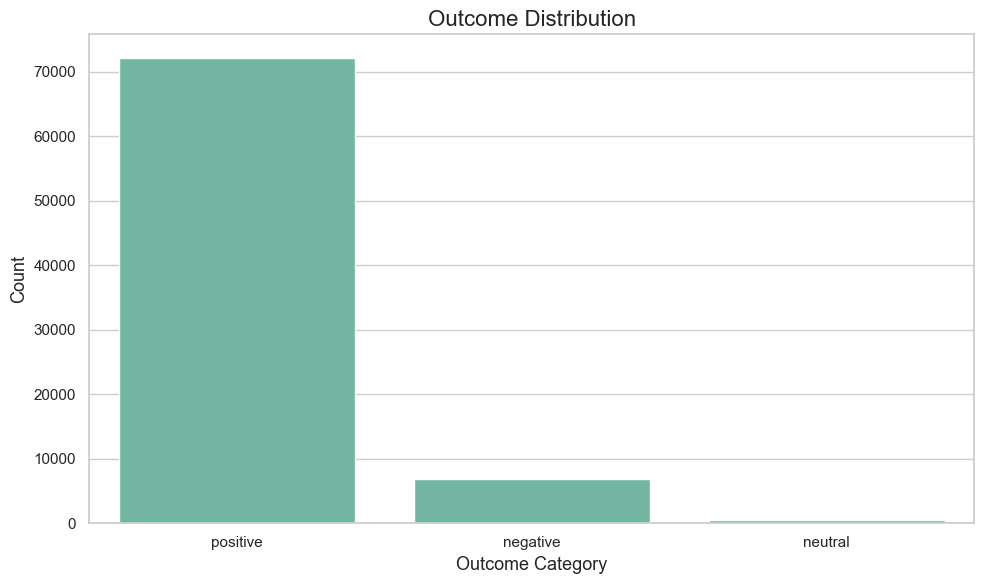

<Figure size 1000x600 with 0 Axes>

In [15]:
sns.countplot(data=df, x='outcome_category')
plt.title('Outcome Distribution')
plt.xlabel('Outcome Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This visualization shows the overall distribution of positive and negative outcomes in the dataset. It highlights the class imbalance, with positive outcomes occurring far more frequently. Understanding this imbalance is essential for selecting appropriate modeling strategies and evaluation metrics. 

## Intake Types

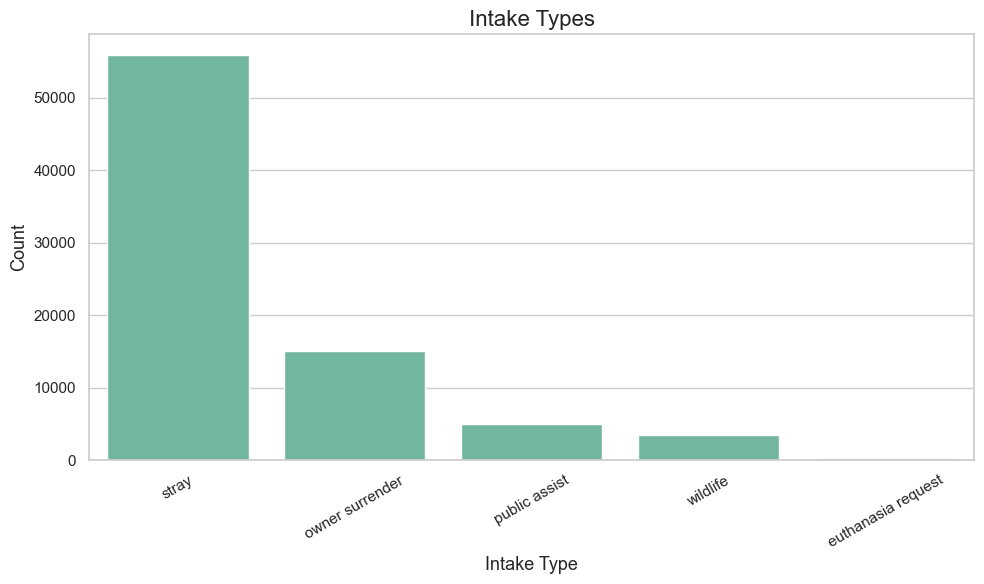

<Figure size 1000x600 with 0 Axes>

In [16]:
sns.countplot(data=df, x='intake_type', order=df['intake_type'].value_counts().index)
plt.title('Intake Types')
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

This chart displays the frequency of different intake types, such as stray, public assist, and owner surrender. Intake type provides important context for understanding why animals enter the shelter and can influence their likelihood of a positive outcome. 

## Species Breakdown

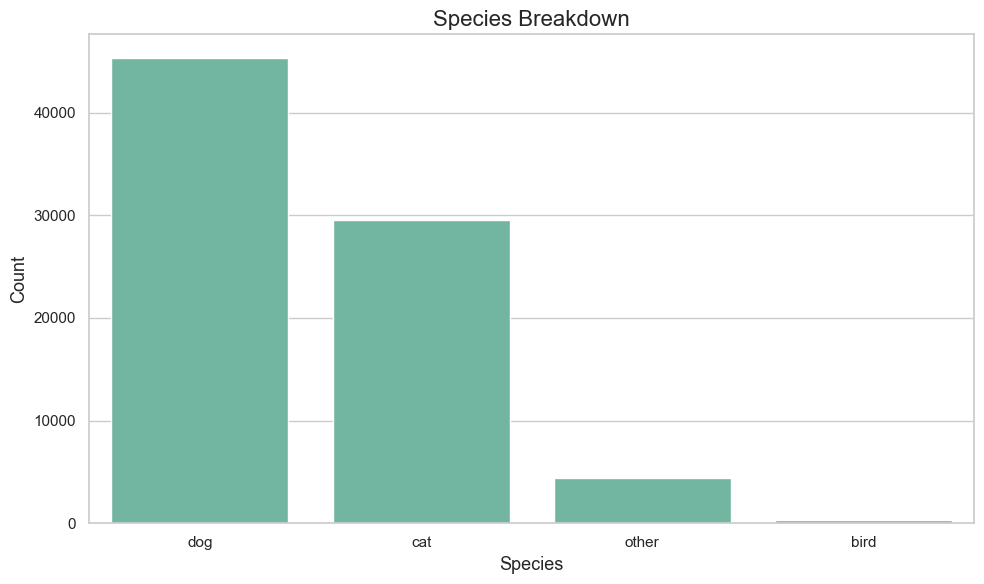

<Figure size 1000x600 with 0 Axes>

In [17]:
sns.countplot(data=df, x='animal_type')
plt.title('Species Breakdown')
plt.xlabel('Species')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This visualization shows the proportion of dogs, cats, and other species in the dataset. Species differences are important because dogs and cats often have different intake patterns, medical needs, and adoption trends, all of which influence outcomes. 

## Age Distribution

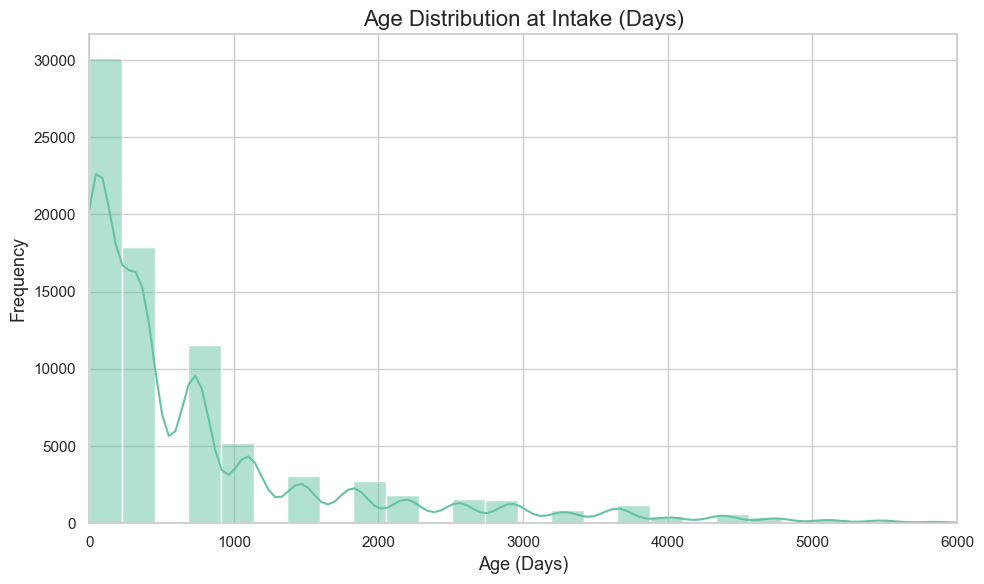

<Figure size 1000x600 with 0 Axes>

In [12]:
sns.histplot(df['age_upon_intake'], bins=40, kde=True)
plt.title('Age Distribution at Intake (Days)')
plt.xlabel('Age (Days)')
plt.ylabel('Frequency')
plt.xlim(0,6000)
plt.tight_layout()
plt.show()

This histogram illustrates the distribution of animal ages at intake (converted to days). The shelter receives a wide range of ages, but younger animals tend to be more common. Age is a key predictor of outcomes, making this distribution important for understanding the population. 

## Length of Stay Distribution

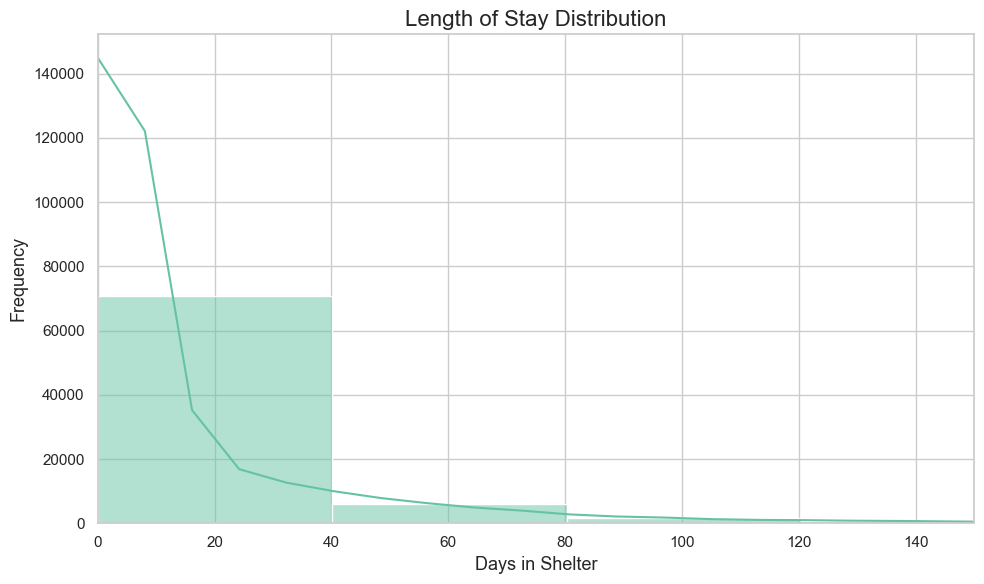

<Figure size 1000x600 with 0 Axes>

In [18]:
sns.histplot(df['time_in_shelter_days'], bins=40, kde=True)
plt.title('Length of Stay Distribution')
plt.xlabel('Days in Shelter')
plt.ylabel('Frequency')
plt.xlim(0,150) #zoom in to results under 150 days
plt.tight_layout()
plt.show()

This plot shows how long animals typically remain in the shelter before an outcome occurs. Length of stay is heavily right-skewed, with most animals leaving quickly and a smaller number staying much longer. This feature is strongly tied to outcome likelihood. 

## Outcome by Intake Type

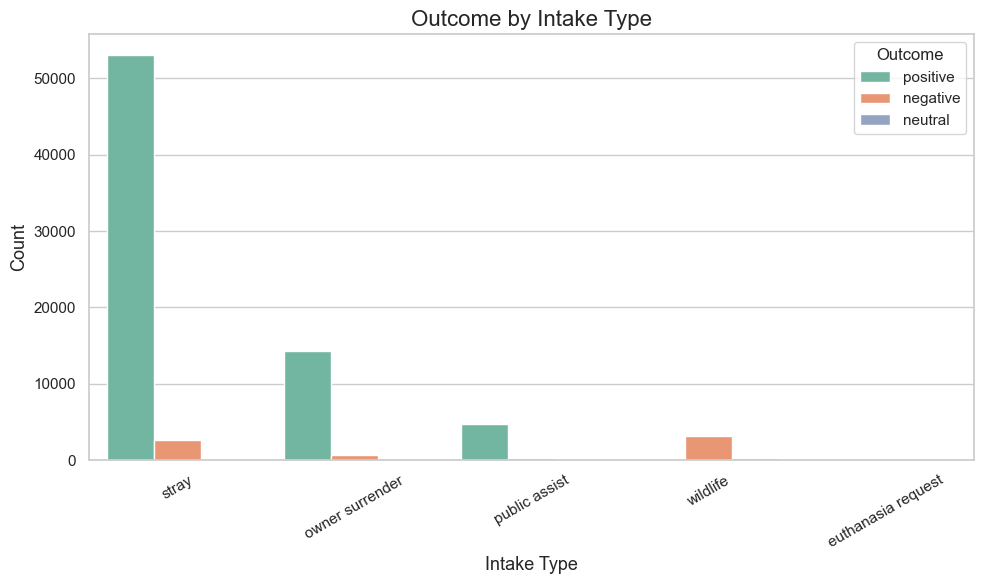

<Figure size 1000x600 with 0 Axes>

In [19]:
sns.countplot(data=df, x='intake_type', hue='outcome_category',
order= df['intake_type'].value_counts().index)
plt.title('Outcome by Intake Type')
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

This grouped bar chart compares outcome categories across different intake types. Certain intake types, such as strays, may have higher return-to-owner rates, while others may correlate with lower positive outcomes. This helps identify operational patterns that influence outcomes. 

## Age vs. Outcome

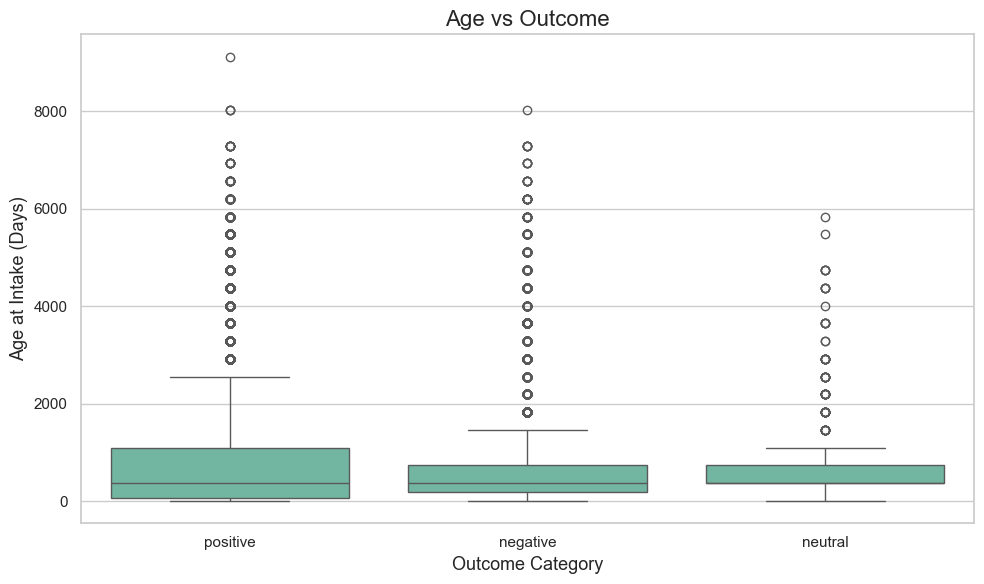

<Figure size 1000x600 with 0 Axes>

In [20]:
sns.boxplot(data=df, x='outcome_category', y='age_upon_intake')
plt.title('Age vs Outcome')
plt.xlabel('Outcome Category')
plt.ylabel('Age at Intake (Days)')
plt.tight_layout()
plt.show()

This visualization vompares the age distribution of animals with positive versus negative outcomes. Younger animals tend to have higher positive outcome rates, while older animals face more challenges. This relationship supports the model's finding that age is a major predictor. 

## Intake Trends Over Time

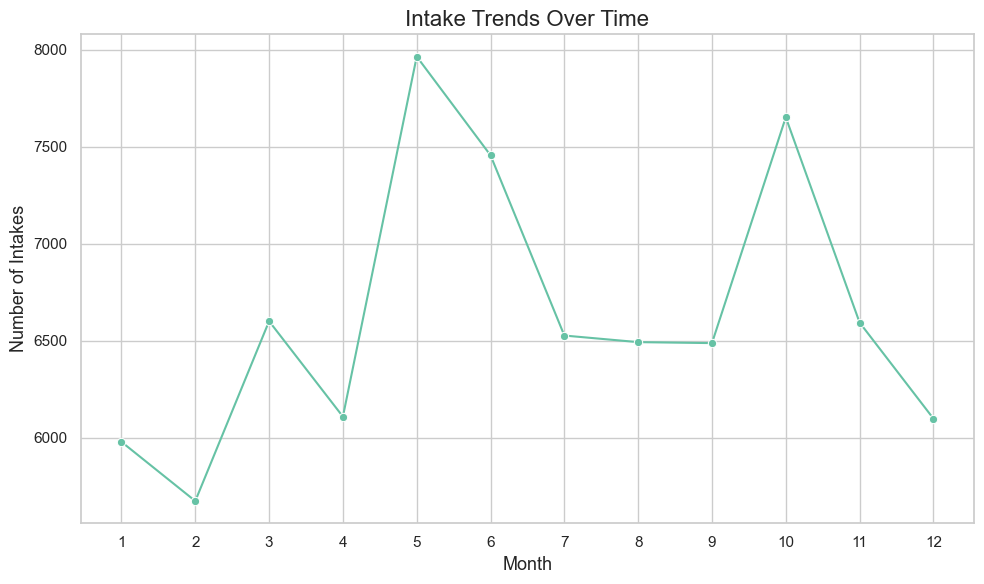

<Figure size 1000x600 with 0 Axes>

In [21]:
monthly = df.groupby('intake_month').size()

sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title('Intake Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Intakes')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

This visualization shows how intake volume changes over time, revealing seasonal patterns such as "kitten season" in the spring and summer. These trends help explain fluctuations in shelter population and resource demands throughout the year. 

## Seasonality by Species

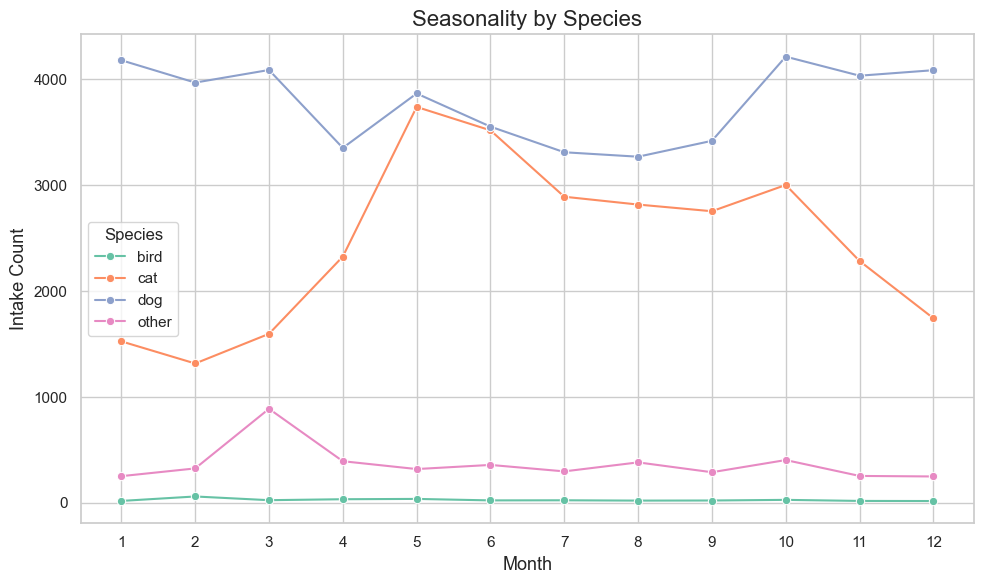

<Figure size 1000x600 with 0 Axes>

In [22]:
monthly_species = df.groupby(['intake_month', 'animal_type']).size().reset_index(name='count')

sns.lineplot(
    data=monthly_species,
    x='intake_month',
    y='count',
    hue='animal_type',
    marker='o'
)

plt.title('Seasonality by Species')
plt.xlabel('Month')
plt.ylabel('Intake Count')
plt.xticks(range(1,13))
plt.legend(title='Species')
plt.tight_layout()
plt.show()

This visualization shows how intake volume changes across the year for each species. By plotting monthly intake counts separately for dogs, cats, and other animals, it highlights species-specific seasonal patterns. For example, cats typically show a sharp increase during spring and summer due to kitten season, while dog intakes may remain more stable throughout the year. Understanding these seasonal trends help explain fluctuations in shelter population, staffing needs, and resource demands, and provides important context for interpreting outcome patterns and model behavior. 